```
[Title] Autoencoder using Tensorflow.Keras
[Author] Yibeck Lee(yibec.Lee@gmail.com)
[Contents]
 - Aucoencoder for Dimension Reduction
[References]
 - https://towardsdatascience.com/pca-vs-autoencoders-1ba08362f450
 - https://medium.com/datadriveninvestor/deep-autoencoder-using-keras-b77cd3e8be95
```

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np

Using TensorFlow backend.


In [2]:
trainFeatures = np.array([
  [1,1,1]
, [1,1,1]
, [1,1,1]
, [1,1,1]
, [1,2,3]
, [2,2,2]
, [2,2,2]
, [2,2,2]
, [2,2,2]
, [1,3,5]
])
print(trainFeatures)

[[1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 2 3]
 [2 2 2]
 [2 2 2]
 [2 2 2]
 [2 2 2]
 [1 3 5]]


In [3]:
encoding_dim = 2
input_img = Input(shape=(3,))
encoded = Dense(encoding_dim)(input_img)
decoded = Dense(3)(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mse')

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
autoencoder.fit(trainFeatures, trainFeatures,
                epochs=100,
                batch_size=2,
                verbose=1,
                shuffle=True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
10/10 [==============================] - 0s 34ms/step - loss: 4.7910
Epoch 2/100
10/10 [==============================] - 0s 499us/step - loss: 4.6355
Epoch 3/100
10/10 [==============================] - 0s 499us/step - loss: 4.4928
Epoch 4/100
10/10 [==============================] - 0s 698us/step - loss: 4.3615
Epoch 5/100
10/10 [==============================] - 0s 698us/step - loss: 4.2369
Epoch 6/100
10/10 [==============================] - 0s 695us/step - loss: 4.1190
Epoch 7/100
10/10 [==============================] - 0s 602us/step - loss: 4.0072
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 3.9035
Epoch 9/100
10/10 [==============================] - 0s 798us/step - loss: 3.8036
Epoch 10/100
10/10 [==============================] - 0s 997us/step - loss: 3.7120
Epoch 11/100
10/10 [==============================] - 0s 698us/step - loss: 3.6205
Epoch 12/100
10/10 [==============================]

In [5]:
decoded_imgs = autoencoder.predict(trainFeatures)

In [6]:
decoded_imgs

array([[0.89476323, 1.1415074 , 1.2813836 ],
       [0.89476323, 1.1415074 , 1.2813836 ],
       [0.89476323, 1.1415074 , 1.2813836 ],
       [0.89476323, 1.1415074 , 1.2813836 ],
       [1.8045337 , 1.504174  , 2.3399632 ],
       [1.1708498 , 1.9189506 , 1.9541394 ],
       [1.1708498 , 1.9189506 , 1.9541394 ],
       [1.1708498 , 1.9189506 , 1.9541394 ],
       [1.1708498 , 1.9189506 , 1.9541394 ],
       [2.7143042 , 1.8668406 , 3.398543  ]], dtype=float32)

In [7]:
error = trainFeatures - decoded_imgs

In [8]:
error_square = error**2
error_square

array([[1.10747775e-02, 2.00243406e-02, 7.91767493e-02],
       [1.10747775e-02, 2.00243406e-02, 7.91767493e-02],
       [1.10747775e-02, 2.00243406e-02, 7.91767493e-02],
       [1.10747775e-02, 2.00243406e-02, 7.91767493e-02],
       [6.47274507e-01, 2.45843428e-01, 4.35648580e-01],
       [6.87490054e-01, 6.56901210e-03, 2.10319905e-03],
       [6.87490054e-01, 6.56901210e-03, 2.10319905e-03],
       [6.87490054e-01, 6.56901210e-03, 2.10319905e-03],
       [6.87490054e-01, 6.56901210e-03, 2.10319905e-03],
       [2.93883892e+00, 1.28405022e+00, 2.56466490e+00]])

In [9]:
error_square = np.sum(error_square, axis=1)
error_square

array([0.11027587, 0.11027587, 0.11027587, 0.11027587, 1.32876652,
       0.69616227, 0.69616227, 0.69616227, 0.69616227, 6.78755405])

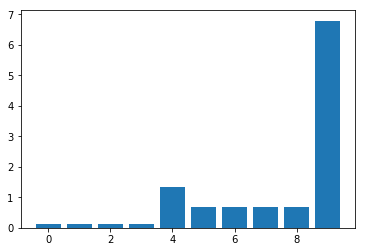

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
ind = np.arange(10) 
plt.bar(ind, error_square)
plt.show()